In [56]:
# calculate the output concentration of a concentration pwm profile 
# at the outlet of a tube with length L and assuming laminar flow
# This represents the most severe pulse widening
# the residence time distribution RTD is from Eq 13-47 
# from "Elements of Chemical Reaction Engineering" Fogler, 3rd ed.
# the exit concentration is the sum of the RTDs at each discrete timestep
# Douwe Bruinsma, 4/4/22
# Brandon Gushlaw Modified for interactive use 04/15/22

import array
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Javascript
from IPython.display import clear_output
import ipywidgets 
from ipywidgets import widgets

#%matplotlib inline
%matplotlib widget 

layout = widgets.Layout(width='auto', height='40px') #set width and height
outbox = widgets.Output(layout={'border': '1px solid black'})
Run = widgets.Button(description="Run Analysis")

PulsedGas= widgets.BoundedFloatText(
    value=11,
    min=0,
    max=30,
    step=0.1,
    description='Pulsed LPM',
    disabled=False
)
PulsedCon= widgets.BoundedFloatText(
    value=.90,
    min=0,
    max=1,
    step=0.01,
    description='Pulsed O2%',
    disabled=False
)
Duty = widgets.BoundedFloatText(
    value=0.5,
    min=0,
    max=1,
    step=0.1,
    description='%:',
    disabled=False
)
Period= widgets.BoundedFloatText(
    value=5,
    min=0,
    max=10,
    step=0.1,
    description='Time {s}:',
    disabled=False
)

AirFlow = widgets.BoundedFloatText(
    value=33,
    min=0,
    max=50,
    step=0.1,
    description='Air LPM:',
    disabled=False
)
TubeRadius=widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10,
    step=0.1,
    description='Radius {mm}:',
    disabled=False
)


TubeLength=widgets.BoundedFloatText(
    value=1.8,
    min=0,
    max=10,
    step=0.1,
    description='Length {m}:',
    disabled=False
)

def Concentration():
    O2p=PulsedGas.value*PulsedCon.value
    O2c=AirFlow.value*.21
    con_high=((O2p+O2c)/(AirFlow.value+PulsedGas.value))*100
    return con_high

# definition of the residence time distribution (eq 13-47)
def RTD(time,tau):
    if time < tau/2:
        return 0
    else:
        return tau**2/(2*time**3)

def Analysis(R,L,conc_high):  
    out = []
    out.clear()



    # inlet pulse parameters

    q = (AirFlow.value+PulsedGas.value)/2     # gas flow rate in LPM
    period = Period.value
    duty = Duty.value
    conc_low = 21
    

    # numerical parameters
    dt = 0.005  # timestep of simulation
    tmax = 20  # time duration of simulation

    # calculated values
    v = (q/60/1000)/(np.pi*R**2)  # average velocity
    Re = 1.1*v*2*R/1.8e-5         # reynolds number
    tau = L/v
    
    

    with outbox:
        outbox.clear_output()
        print("reynolds number: ",Re)
        print("average time:    ",tau)
        print("Concetration during Pulse %:", conc_high)


 
    # step through each timestep

    for i in range(1,int(tmax/dt)):
        runtime = i*dt
        temp=0    
        for j in range(1,i):
            feedtime = j*dt
            # at each timestep calculate the RTD contribution from 
            # each timestep up to the runtime
            # only add the contribution when the concentration is "high"
            if (feedtime%period) < (duty*period):
                temp=temp+RTD((runtime-feedtime),tau)*dt
        out.append(temp)

        #print(out)

    time = []
    time.clear
    for i in range(len(out)):
        out[i] = conc_low + out[i] * (conc_high-conc_low)
        time.append(dt*i)
    plt.clf()
    plt.plot(time,out)
    plt.show()


def preview_clicked(b):
           # tube parameters
        R = TubeRadius.value/1000 #tube radius in meters
        L = TubeLength.value    # tube length in meters
        conc_high=Concentration()
        Analysis(R,L,conc_high)
    
display(TubeRadius,TubeLength,AirFlow,PulsedGas,PulsedCon,Period,Duty,Run,outbox)

    
Run.on_click(preview_clicked)



BoundedFloatText(value=7.5, description='Radius {mm}:', max=10.0, step=0.1)

BoundedFloatText(value=1.8, description='Length {m}:', max=10.0, step=0.1)

BoundedFloatText(value=33.0, description='Air LPM:', max=50.0, step=0.1)

BoundedFloatText(value=11.0, description='Pulsed LPM', max=30.0, step=0.1)

BoundedFloatText(value=0.9, description='Pulsed O2%', max=1.0, step=0.01)

BoundedFloatText(value=5.0, description='Time {s}:', max=10.0, step=0.1)

BoundedFloatText(value=0.5, description='%:', max=1.0, step=0.1)

Button(description='Run Analysis', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

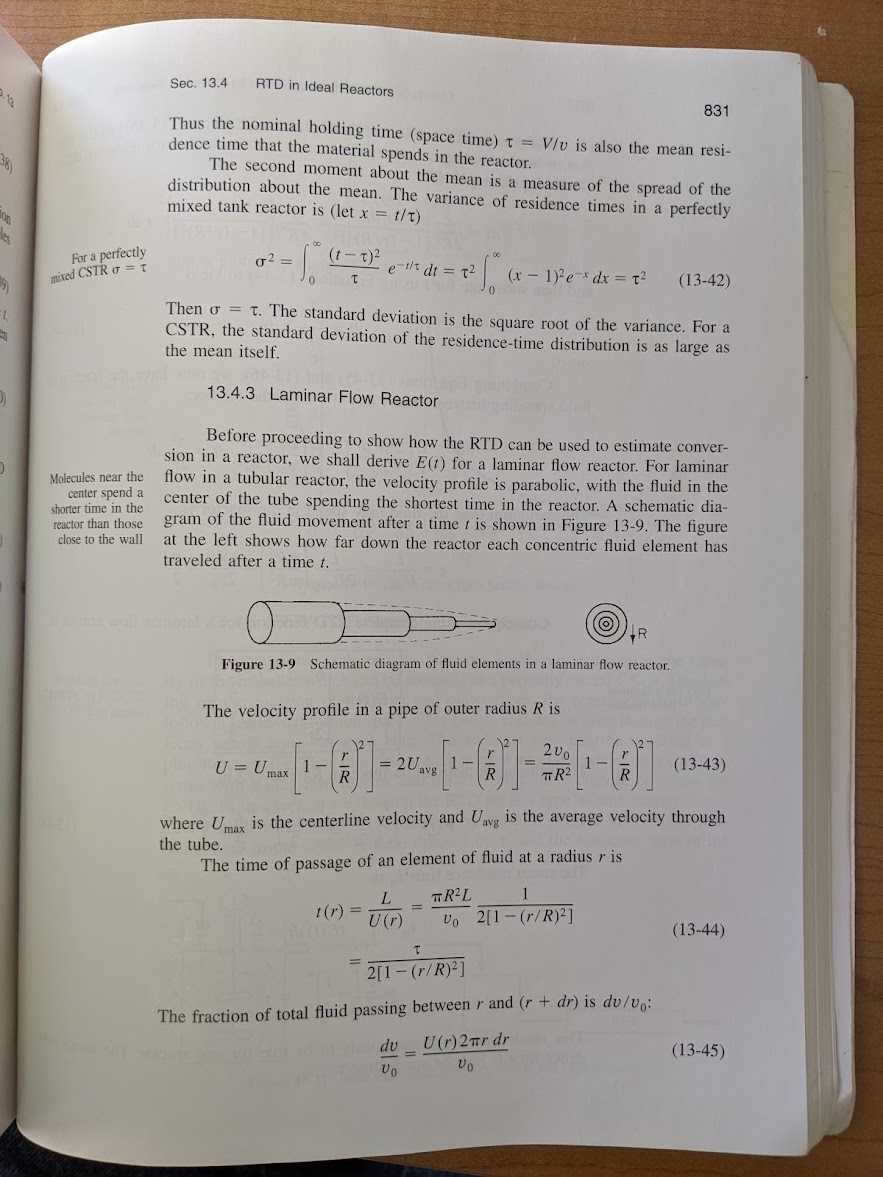

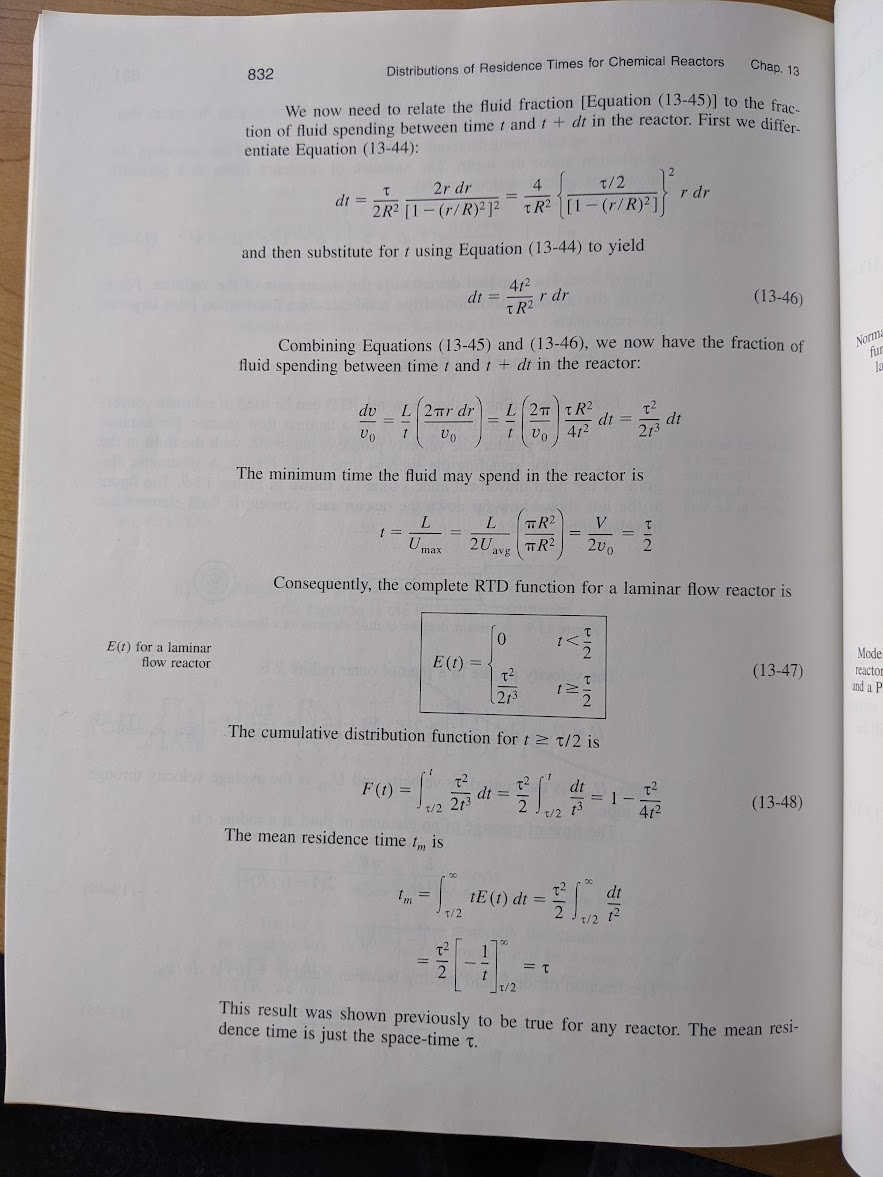

In [58]:
import session_info
session_info.show()